Import fichier pour mise en forme dans dataframe

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
repertoire = '/content/drive/MyDrive/Nao_School/Projet1/dataset'

In [4]:
!ls $repertoire

CO2_habitant.xlsx  EnergieConsumption.xlsx  population.xlsx	temp_evol.xlsx
df_final.xlsx	   niveau_richesse.xlsx     temp_ev_month.xlsx


In [5]:
import pandas as pd
df_final = pd.read_excel(repertoire + '/df_final.xlsx')

Analyses

Filtre sur les niveaux de revenus

In [12]:
df_final["Income_Group"].unique()

array(['Revenu élevé', 'Revenu intermédiaire, tranche supérieure',
       'Revenu intermédiaire, tranche inférieure'], dtype=object)

In [21]:
df_final_rel = df_final[df_final["Income_Group"]=='Revenu élevé']

In [22]:
df_final_rint = df_final[df_final["Income_Group"]=='Revenu intermédiaire, tranche supérieure']

In [23]:
df_final_rinf = df_final[df_final["Income_Group"]=='Revenu intermédiaire, tranche inférieure']

In [19]:
df_final["Element"].unique()

array(['Temperature change', 'Standard Deviation'], dtype=object)

Filtre sur les écarts de température

In [24]:
df_final_rel_t = df_final_rel[df_final_rel["Element"]=='Temperature change']

In [25]:
df_final_rint_t = df_final_rint[df_final_rint["Element"]=='Temperature change']

In [26]:
df_final_rinf_t = df_final_rinf[df_final_rinf["Element"]=='Temperature change']

Corrélation entre CO2, total population, consommation d'energie, et différence de température (change) par type de revenus

Corrélation entre le total de la population et des consommations d'énergie sur les pays à forts revenus

In [7]:
import seaborn as sns                       # vizualisation
import matplotlib.pyplot as plt             # vizualisation

,CO2_level,Total population,Temp_values,Coal Consumption - EJ,Gas Consumption - EJ,Geo Biomass Other - TWh,Hydro Generation - TWh,Nuclear Generation - TWh,Solar Generation - TWh,Wind Generation -TWh,Oil Consumption - EJ
CO2_level,1.000000,0.084646,-0.159282,0.287460,0.288527,0.102416,0.229798,0.043280,-0.092486,0.004839,0.243802
Total population,0.084646,1.000000,-0.032006,0.929021,0.932370,0.903568,0.453409,0.875044,0.361660,0.547686,0.967677
Temp_values,-0.159282,-0.032006,1.000000,-0.062108,-0.027730,0.039202,0.019901,-0.004834,0.117288,0.102610,-0.048122
Coal Consumption - EJ,0.287460,0.929021,-0.062108,1.000000,0.932752,0.869441,0.492056,0.824349,0.177706,0.376391,0.973266
Gas Consumption - EJ,0.288527,0.932370,-0.027730,0.932752,1.000000,0.900529,0.559835,0.838863,0.347442,0.607653,0.968861
Geo Biomass Other - TWh,0.102416,0.903568,0.039202,0.869441,0.900529,1.000000,0.471321,0.754941,0.492221,0.663208,0.891491
Hydro Generation - TWh,0.229798,0.453409,0.019901,0.492056,0.559835,0.471321,1.000000,0.483505,0.073564,0.240799,0.546733
Nuclear Generation - TWh,0.043280,0.875044,-0.004834,0.824349,0.838863,0.754941,0.483505,1.000000,0.186288,0.473300,0.880832
Solar Generation - TWh,-0.092486,0.361660,0.117288,0.177706,0.347442,0.492221,0.073564,0.186288,1.000000,0.745086,0.256800
Wind Generation -TWh,0.004839,0.547686,0.102610,0.376391,0.607653,0.663208,0.240799,0.473300,0.745086,1.000000,0.483103


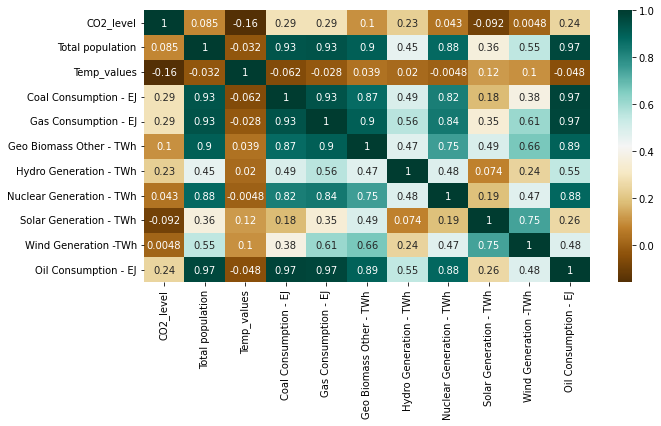

In [21]:
plt.figure(figsize=(10,5))
fig = df_final_rel_t[['CO2_level','Total population','Temp_values','Coal Consumption - EJ', 'Gas Consumption - EJ', 'Geo Biomass Other - TWh', 'Hydro Generation - TWh', 'Nuclear Generation - TWh', 'Solar Generation - TWh', 'Wind Generation -TWh', 'Oil Consumption - EJ']].corr()
sns.heatmap(fig,cmap="BrBG",annot=True)
fig


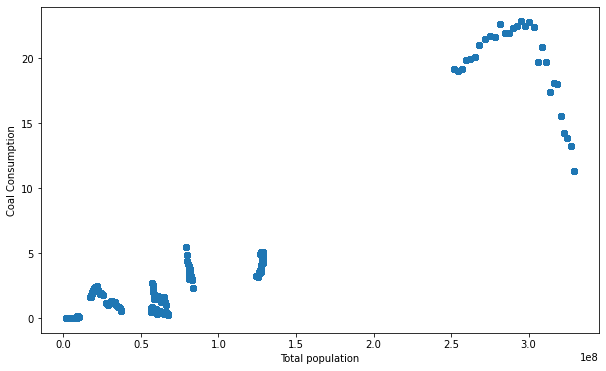

In [31]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df_final_rel_t['Total population'], df_final_rel_t['Coal Consumption - EJ'])
ax.set_xlabel('Total population')
ax.set_ylabel('Coal Consumption')
plt.show()

Corrélation entre le total de la population et des consommations d'énergie sur les pays à revenus intermédiaires

,CO2_level,Total population,Temp_values,Coal Consumption - EJ,Gas Consumption - EJ,Geo Biomass Other - TWh,Hydro Generation - TWh,Nuclear Generation - TWh,Solar Generation - TWh,Wind Generation -TWh,Oil Consumption - EJ
CO2_level,1.000000,0.123946,0.106045,0.325714,0.333091,0.346893,0.323245,0.418699,0.268760,0.344673,0.323327
Total population,0.123946,1.000000,0.149913,0.907511,0.582864,0.535932,0.794217,0.606110,0.364145,0.498121,0.867197
Temp_values,0.106045,0.149913,1.000000,0.204739,0.225565,0.204717,0.220784,0.227184,0.183017,0.205548,0.211000
Coal Consumption - EJ,0.325714,0.907511,0.204739,1.000000,0.757753,0.734927,0.949167,0.798367,0.507440,0.694298,0.965377
Gas Consumption - EJ,0.333091,0.582864,0.225565,0.757753,1.000000,0.948036,0.885549,0.905056,0.763016,0.891705,0.877856
Geo Biomass Other - TWh,0.346893,0.535932,0.204717,0.734927,0.948036,1.000000,0.896816,0.975460,0.894503,0.981708,0.839287
Hydro Generation - TWh,0.323245,0.794217,0.220784,0.949167,0.885549,0.896816,1.000000,0.922207,0.689066,0.866801,0.969755
Nuclear Generation - TWh,0.418699,0.606110,0.227184,0.798367,0.905056,0.975460,0.922207,1.000000,0.897960,0.974124,0.867409
Solar Generation - TWh,0.268760,0.364145,0.183017,0.507440,0.763016,0.894503,0.689066,0.897960,1.000000,0.930522,0.612246
Wind Generation -TWh,0.344673,0.498121,0.205548,0.694298,0.891705,0.981708,0.866801,0.974124,0.930522,1.000000,0.780576


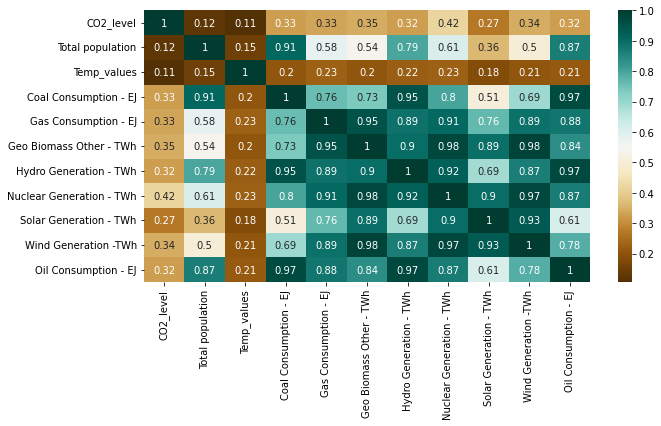

In [24]:
plt.figure(figsize=(10,5))
fig = df_final_rint_t[['CO2_level','Total population','Temp_values','Coal Consumption - EJ', 'Gas Consumption - EJ', 'Geo Biomass Other - TWh', 'Hydro Generation - TWh', 'Nuclear Generation - TWh', 'Solar Generation - TWh', 'Wind Generation -TWh', 'Oil Consumption - EJ']].corr()
sns.heatmap(fig,cmap="BrBG",annot=True)
fig

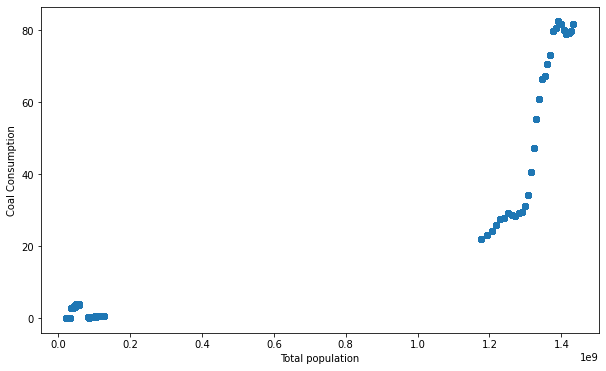

In [30]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df_final_rint_t['Total population'], df_final_rint_t['Coal Consumption - EJ'])
ax.set_xlabel('Total population')
ax.set_ylabel('Coal Consumption')
plt.show()

Corrélation entre le total de la population et des consommations d'énergie sur les pays à revenus faibles

,CO2_level,Total population,Temp_values,Coal Consumption - EJ,Gas Consumption - EJ,Geo Biomass Other - TWh,Hydro Generation - TWh,Nuclear Generation - TWh,Solar Generation - TWh,Wind Generation -TWh,Oil Consumption - EJ
CO2_level,1.000000,-0.475083,0.257384,-0.360206,0.347207,-0.158106,-0.438731,-0.309990,-0.019594,-0.121208,-0.324732
Total population,-0.475083,1.000000,-0.257470,0.944085,0.465574,0.736679,0.978904,0.900943,0.408576,0.669013,0.937317
Temp_values,0.257384,-0.257470,1.000000,-0.196020,-0.078345,-0.108322,-0.255259,-0.174340,-0.030271,-0.075483,-0.206722
Coal Consumption - EJ,-0.360206,0.944085,-0.196020,1.000000,0.520205,0.914869,0.972808,0.982319,0.596813,0.866345,0.983775
Gas Consumption - EJ,0.347207,0.465574,-0.078345,0.520205,1.000000,0.546919,0.528919,0.535100,0.365715,0.530238,0.618751
Geo Biomass Other - TWh,-0.158106,0.736679,-0.108322,0.914869,0.546919,1.000000,0.823228,0.933924,0.683668,0.959725,0.893989
Hydro Generation - TWh,-0.438731,0.978904,-0.255259,0.972808,0.528919,0.823228,1.000000,0.938233,0.502715,0.767671,0.972106
Nuclear Generation - TWh,-0.309990,0.900943,-0.174340,0.982319,0.535100,0.933924,0.938233,1.000000,0.630463,0.888861,0.973521
Solar Generation - TWh,-0.019594,0.408576,-0.030271,0.596813,0.365715,0.683668,0.502715,0.630463,1.000000,0.847636,0.600464
Wind Generation -TWh,-0.121208,0.669013,-0.075483,0.866345,0.530238,0.959725,0.767671,0.888861,0.847636,1.000000,0.857539


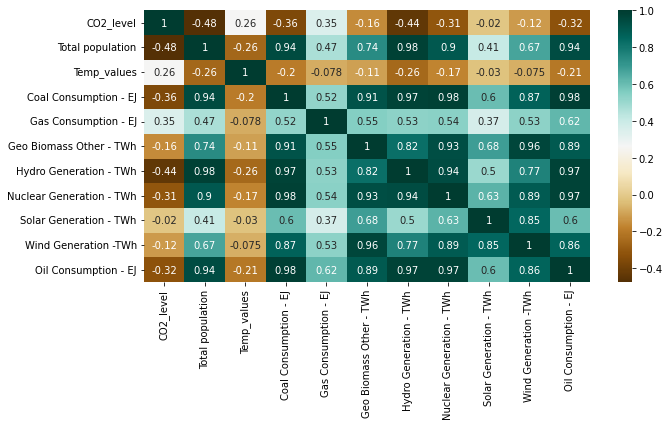

In [25]:
plt.figure(figsize=(10,5))
fig = df_final_rinf_t[['CO2_level','Total population','Temp_values','Coal Consumption - EJ', 'Gas Consumption - EJ', 'Geo Biomass Other - TWh', 'Hydro Generation - TWh', 'Nuclear Generation - TWh', 'Solar Generation - TWh', 'Wind Generation -TWh', 'Oil Consumption - EJ']].corr()
sns.heatmap(fig,cmap="BrBG",annot=True)
fig

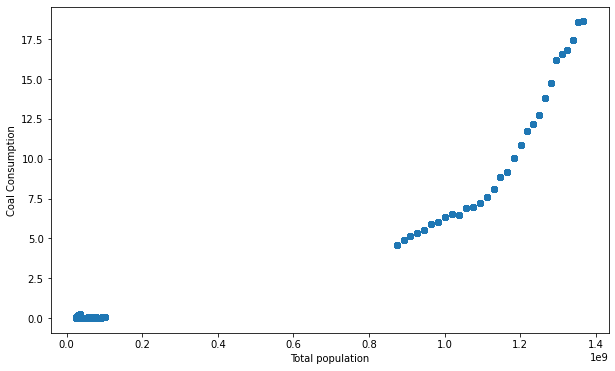

In [32]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df_final_rinf_t['Total population'], df_final_rinf_t['Coal Consumption - EJ'])
ax.set_xlabel('Total population')
ax.set_ylabel('Coal Consumption')
plt.show()

**Relation entre le niveau de CO2 et le changement de température**

In [30]:
df_final_t = df_final[df_final["Element"]=='Temperature change']

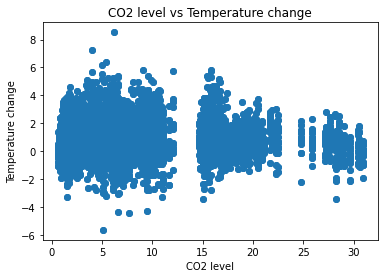

In [32]:
import matplotlib.pyplot as plt

# Create scatter plot
plt.scatter(df_final_t['CO2_level'], df_final_t['Temp_values'])

# Add axis labels and title
plt.xlabel('CO2 level')
plt.ylabel('Temperature change')
plt.title('CO2 level vs Temperature change')
plt.show()

**Evolution du niveau de CO2 en moyenne des 18 pays (1990 à 2020)**

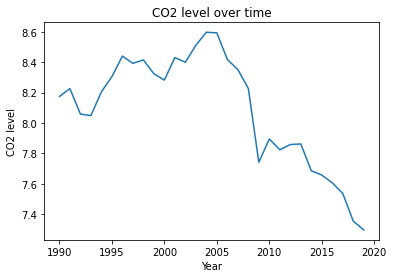

In [13]:
# Group data by year and calculate the mean of CO2_level
grouped_data = df_final.groupby('Year')['CO2_level'].mean()

# Create line chart
plt.plot(grouped_data.index, grouped_data.values)

# Add axis labels and title
plt.xlabel('Year')
plt.ylabel('CO2 level')
plt.title('CO2 level over time')
plt.show()

**Consommation de charbon par pays**

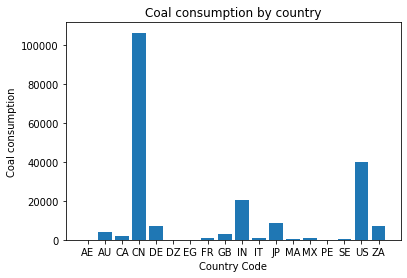

In [35]:
import matplotlib.pyplot as plt

# Group data by country code
grouped_data = df_final.groupby('Country_Code')['Coal Consumption - EJ'].sum()

# Create bar chart
plt.bar(grouped_data.index, grouped_data.values)

# Add axis labels and title
plt.xlabel('Country Code')
plt.ylabel('Coal consumption')
plt.title('Coal consumption by country')
plt.show()

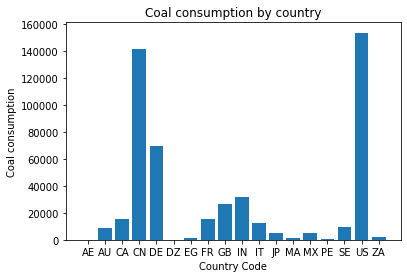

In [63]:
import matplotlib.pyplot as plt

# Group data by country code
grouped_data = df_final.groupby('Country_Code')['Wind Generation -TWh'].sum()

# Create bar chart
plt.bar(grouped_data.index, grouped_data.values)

# Add axis labels and title
plt.xlabel('Country Code')
plt.ylabel('Coal consumption')
plt.title('Coal consumption by country')
plt.show()

**Comparaison des éléments CO2 niveau, total population, Coal consumption selon un échantillon de pays par niveau de revenu**

In [53]:
df_final_rel["Country"].unique()

array(['United Arab Emirates', 'Australia', 'Canada', 'Germany', 'France',
       'United Kingdom', 'Italy', 'Japan', 'Sweden',
       'United States of America'], dtype=object)

. Niveau de revenu elevé : France

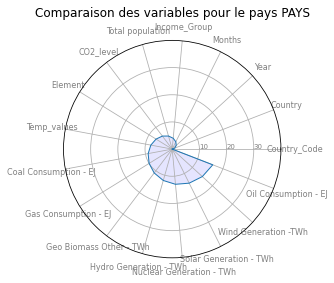

In [51]:
import numpy as np

# Créer un graphique en radar pour comparer les différentes variables pour chaque pays
variables = list(df_final.columns[1:])  # Liste des noms de colonnes, sans le pays
N = len(variables)
values = df_final.loc[df_final['Country_Code'] == 'FR'].values.tolist()[0][1:] # Liste des valeurs pour le pays choisi

angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]  # Pour fermer le polygone

ax = plt.subplot(111, polar=True)

plt.xticks(angles[:-1], variables, color='grey', size=8)
ax.set_rlabel_position(0)
plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
plt.ylim(0, 40)

values += values[:1]  # Pour fermer le polygone
ax.plot(angles, values, linewidth=1, linestyle='solid')

ax.fill(angles, values, 'b', alpha=0.1)

plt.title('Comparaison des variables pour le pays France')
plt.show()


. Niveau de revenu intermédiaire : Mexique



In [60]:
df_final_rint["Country_Code"].unique()

array(['CN', 'MX', 'PE', 'ZA'], dtype=object)

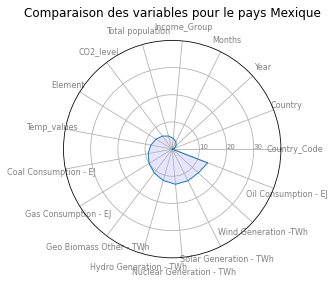

In [61]:
import numpy as np

# Créer un graphique en radar pour comparer les différentes variables pour chaque pays
variables = list(df_final.columns[1:])  # Liste des noms de colonnes, sans le pays
N = len(variables)
values = df_final.loc[df_final['Country_Code'] == 'PE'].values.tolist()[0][1:] # Liste des valeurs pour le pays choisi

angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]  # Pour fermer le polygone

ax = plt.subplot(111, polar=True)

plt.xticks(angles[:-1], variables, color='grey', size=8)
ax.set_rlabel_position(0)
plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
plt.ylim(0, 40)

values += values[:1]  # Pour fermer le polygone
ax.plot(angles, values, linewidth=1, linestyle='solid')

ax.fill(angles, values, 'b', alpha=0.1)

plt.title('Comparaison des variables pour le pays Mexique')
plt.show()

In [58]:
df_final_rinf["Country_Code"].unique()

array(['DZ', 'EG', 'IN', 'MA'], dtype=object)

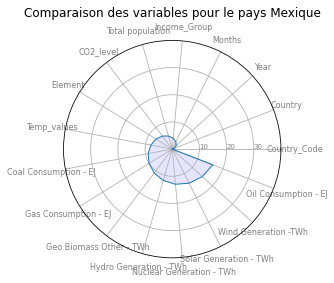

In [62]:
import numpy as np

# Créer un graphique en radar pour comparer les différentes variables pour chaque pays
variables = list(df_final.columns[1:])  # Liste des noms de colonnes, sans le pays
N = len(variables)
values = df_final.loc[df_final['Country_Code'] == 'IN'].values.tolist()[0][1:] # Liste des valeurs pour le pays choisi

angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]  # Pour fermer le polygone

ax = plt.subplot(111, polar=True)

plt.xticks(angles[:-1], variables, color='grey', size=8)
ax.set_rlabel_position(0)
plt.yticks([10,20,30], ["10","20","30"], color="grey", size=7)
plt.ylim(0, 40)

values += values[:1]  # Pour fermer le polygone
ax.plot(angles, values, linewidth=1, linestyle='solid')

ax.fill(angles, values, 'b', alpha=0.1)

plt.title('Comparaison des variables pour le pays Mexique')
plt.show()